<a href="https://colab.research.google.com/github/sagsshakya/Machine-Learning/blob/master/Machine%20Learning%20LAB/Q17_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q17. Stochastic Gradient Descent.
### Problem Statement:
    Demonstrate to find the values of the parameters of a function that minimizes the cost function using Stochastic Gradient Descent.

### Cost function:
    J(theta0, theta1, theta2,..., thetam) = (1/2*m) * np.sum(h_i, y_i)**2

### Updation Rule:
    theta0 = theta0 - (alpha/m) * np.sum(h_i - y_i)
    thetai = thetai - (alpha/m) * np.sum((h_i - y_i) * X_i)

# Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

In [3]:
# Constructing the dataset manually.
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 500,
                       n_features = 5,
                       n_informative = 5,
                       n_targets = 1,
                       noise = 0.1, 
                       random_state = 100)

In [5]:
# Normalize X.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Number of training examples.
m = X.shape[0]

# Number of features.
num_features = X.shape[1]

# Initiate theta values.
np.random.seed(100)
theta = np.random.randn(num_features)

# Define the hypothesis function.
def hypothesis(theta, X):
    return theta*X

# Use the definition of cost function.
def compute_cost(X, Y , theta):
    Y1 = hypothesis(theta, X)
    Y1 = np.sum(Y1, axis = 1)
    return np.sum(np.sqrt((Y1 - Y) ** 2)) / (2*m)

# Gradient Descent algorithm.
def gradient_descent(X, Y, theta, alpha = 0.01, num_iter = 1000):
    '''
    theta -- the weight values to be tuned.
    alpha -- learning rate.
    num_iter -- number of iterations.
    '''

    J = [] # stores value of cost at each iteration.
    for ii in range(num_iter):
        Y1 = hypothesis(theta, X)
        Y1 = np.sum(Y1, axis = 1)

        for jj in range(num_features):
            theta[jj] -= (alpha/m) * (np.sum((Y1 - Y) * X[:,jj]))
        cost = compute_cost(X, Y, theta)
        J.append(cost)

    return J, cost, theta


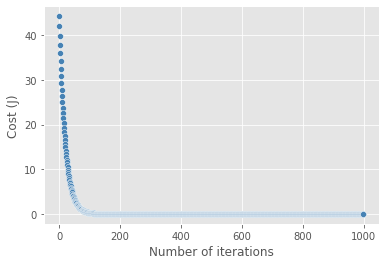

In [31]:
# Applying gradient descent to find the weights on the given dataset.
J, j, theta = gradient_descent(X, Y, theta, 0.05, 1000)

# Visualizing the trend of the cost function with the number of iterations.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.scatterplot(x= np.arange(len(J)), y = J, color = 'steelblue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.show()

In [32]:
print('The weight values for each features are: ')
print(theta.round(3))

The weight values for each features are: 
[47.983 86.044 14.339 16.773 54.532]
